## importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Collection & Analysis

In [5]:
insurance_dataset = pd.read_csv('insurance.csv')
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insurance_dataset.shape

(1338, 7)

In [9]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [16]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Analysis

In [19]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

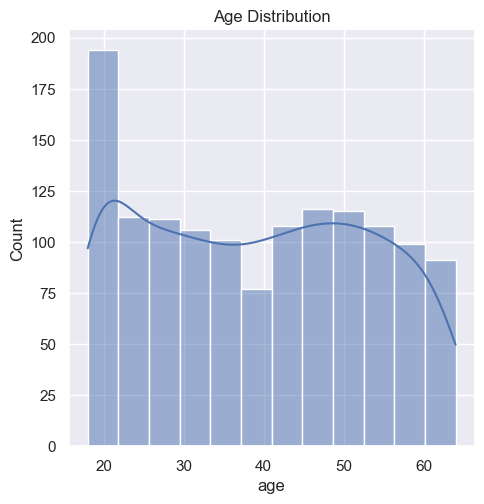

In [47]:
# distribution of age value
# sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'], kde=True)
plt.title('Age Distribution')
plt.show()

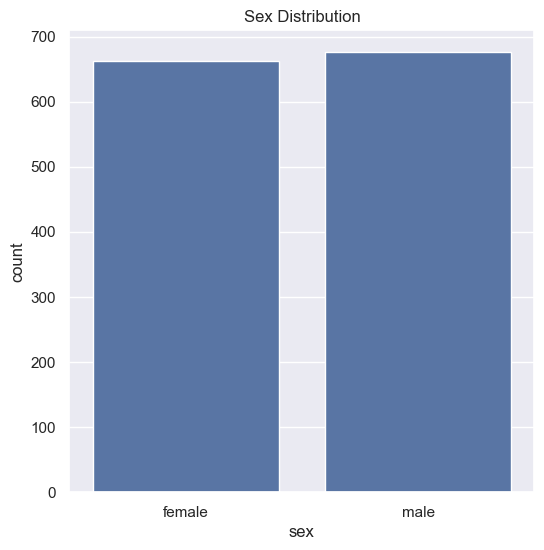

In [49]:
# distribution of Gender value
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data = insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [51]:
insurance_dataset.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

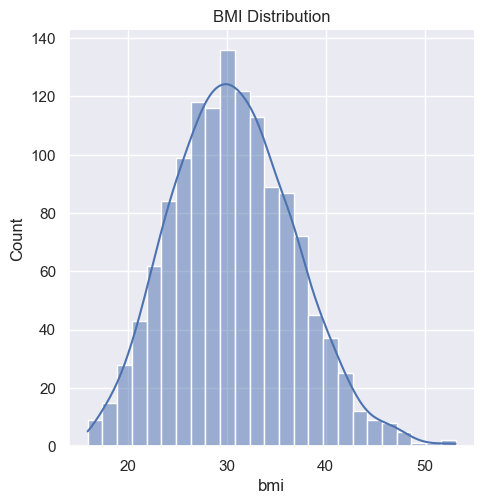

In [53]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

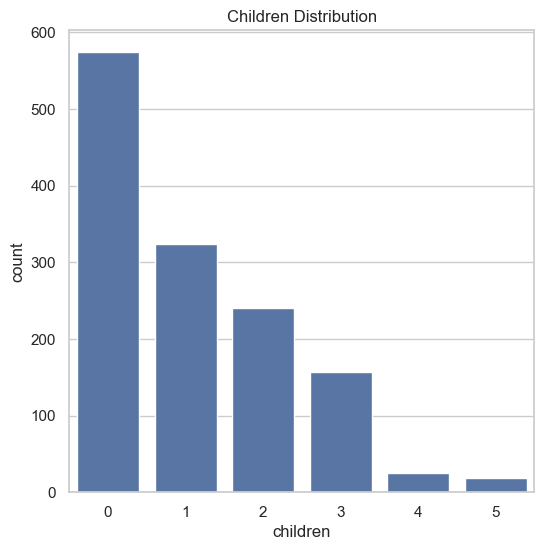

In [57]:
# Children Countplot
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
sns.countplot(x='children', data = insurance_dataset)
plt.title('Children Distribution')
plt.show()

In [59]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

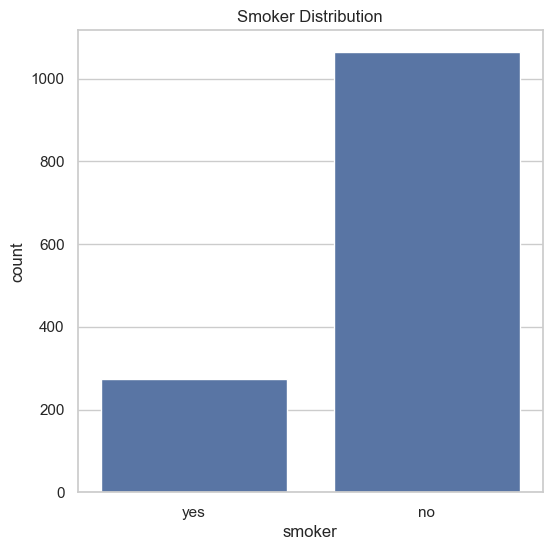

In [61]:
# Smoker Countplot
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data = insurance_dataset)
plt.title('Smoker Distribution')
plt.show()

In [63]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

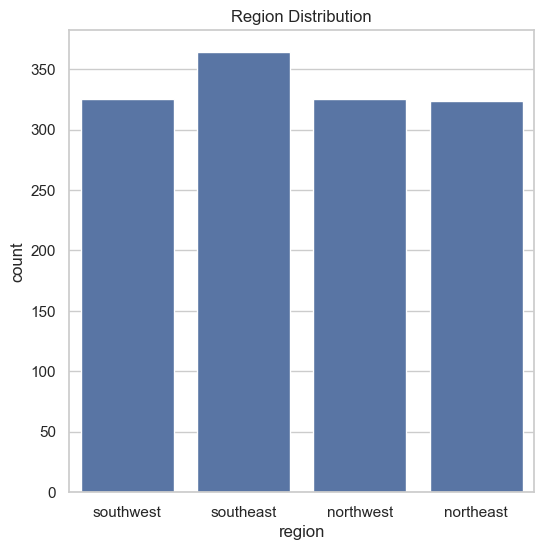

In [65]:
# Region Countplot
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
sns.countplot(x='region', data = insurance_dataset)
plt.title('Region Distribution')
plt.show()

In [67]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

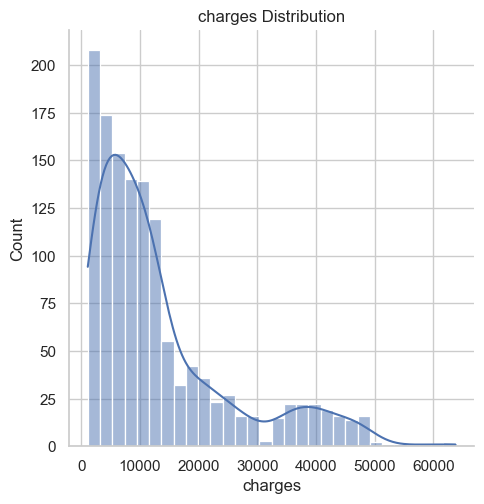

In [69]:
# charges distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'], kde=True)
plt.title('charges Distribution')
plt.show()

## Data Pre-Processing